In [21]:
import gobanana as gb
import cv2
import numpy as np

In [69]:
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    print("Error")

        
ret = True
board_dimensions = None
ret, frame = cap.read()
while True:
    ret, frame = cap.read()
    # print(ret, frame)
    if ret:
        key = cv2.waitKey(1)
        if key == 27:   # Escape
                break
        cv2.imshow("Camera", frame)
        resized = cv2.resize(frame, (600,400), interpolation = cv2.INTER_AREA)
        cv2.imshow("Resized", resized)

        gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
        cv2.imshow("Gray", gray)
        blur = cv2.medianBlur(gray, 5)
        cv2.imshow("Blur", blur)

        sharpen_kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
        sharpen = cv2.filter2D(blur, -1, sharpen_kernel)
        cv2.imshow("Sharpen", sharpen)


        # # Threshold and morph close
        # thresh = cv2.threshold(sharpen, 127, 255, cv2.THRESH_BINARY_INV)[1]
        # thresh2 = cv2.adaptiveThreshold(sharpen,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,3,10)
        # kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
        # # close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
        # close2 = cv2.morphologyEx(thresh2, cv2.MORPH_CLOSE, kernel, iterations=2)

        # # Find contours and filter using threshold area
        # contours, hierarchy = cv2.findContours(close2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)



cap.release()
cv2.destroyAllWindows()

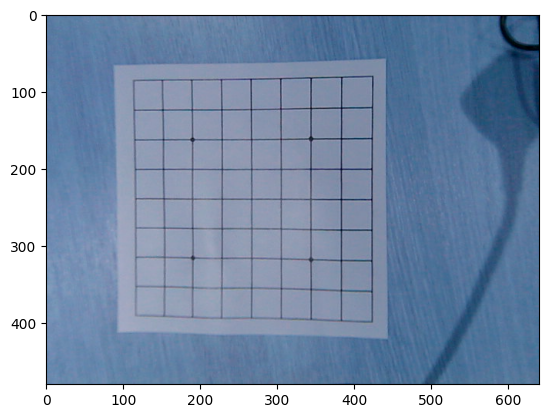

In [70]:
import cv2
from matplotlib import pyplot as plt

#Show the image with matplotlib
plt.imshow(frame)
plt.show()


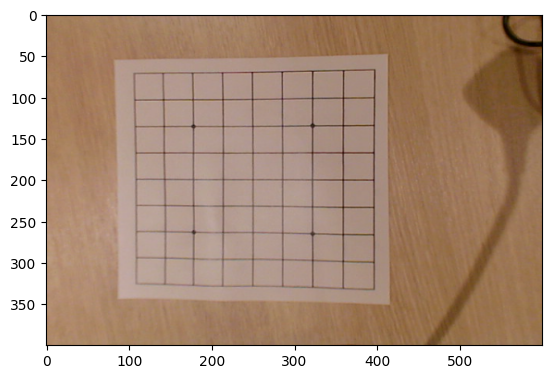

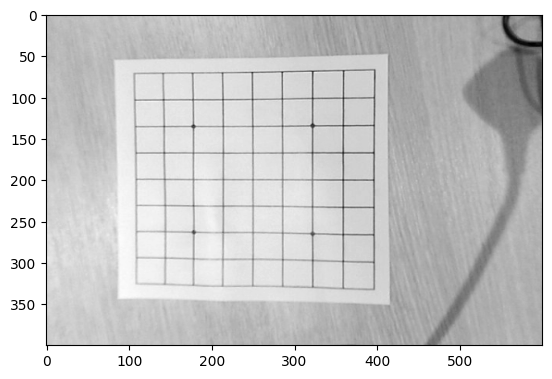

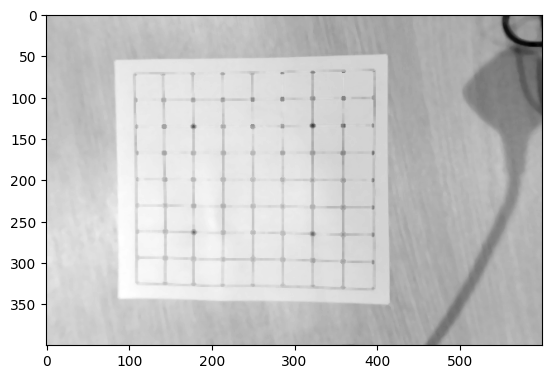

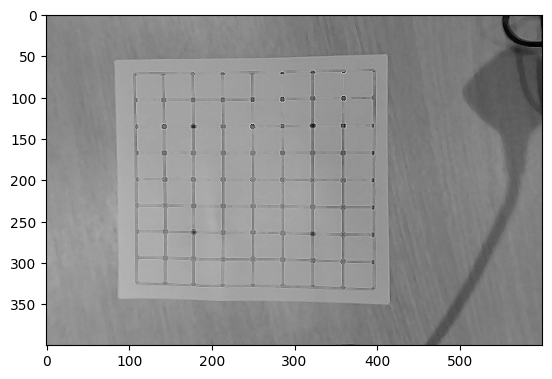

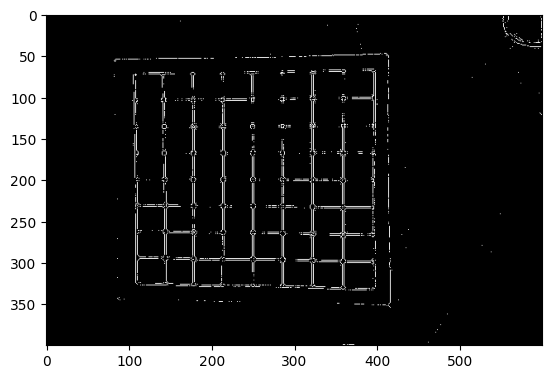

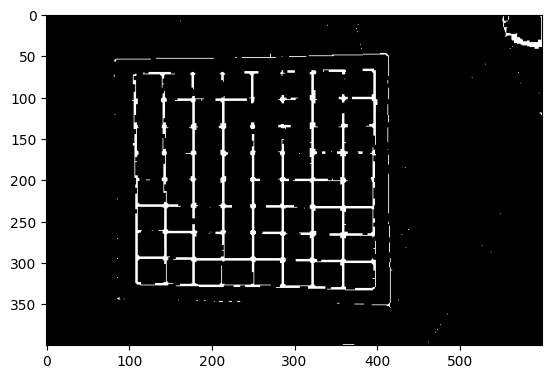

In [77]:
# Resize the image
resized = cv2.resize(frame, (600,400), interpolation = cv2.INTER_AREA)
resized =  np.flip(resized, -1)     # Convert from BGR to RGB
plt.imshow(resized)
plt.show()

# Convert to grayscale so we don't have to worry about colour
gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

# Blur the image to remove noise
blur = cv2.medianBlur(gray, 5)
plt.imshow(blur, cmap='gray')
plt.show()

# Sharpen the details that remain
sharpen_kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
sharpen = cv2.filter2D(blur, -1, sharpen_kernel)
plt.imshow(sharpen, cmap='gray')
plt.show()

# Apply an adaptive threshold to make it black or white
thresh2 = cv2.adaptiveThreshold(sharpen,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,3,10)
plt.imshow(thresh2, cmap='gray')
plt.show()

# Apply morphological transformation "closing" to remove small holes in the image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
close2 = cv2.morphologyEx(thresh2, cv2.MORPH_CLOSE, kernel, iterations=2)
plt.imshow(close2, cmap='gray')

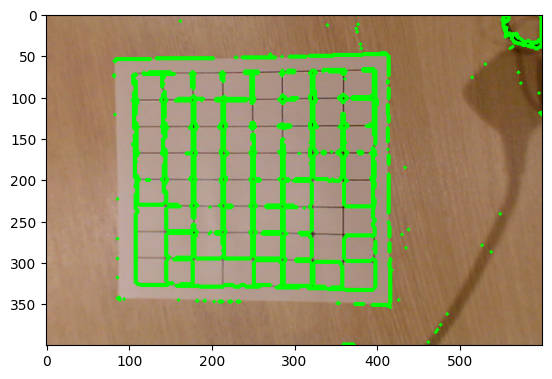

In [72]:
contours, hierarchy = cv2.findContours(close2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# contours = contours[0] if len(contours) == 2 else contours[1]
# print(f'countours: { contours}')
min_area = 1000
max_area = 500000
rects = []
for c in contours:
    area = cv2.contourArea(c)
    if area > min_area and area < max_area:
        x,y,w,h = cv2.boundingRect(c)
        rects.append((x,y,w,h))
        resized = np.ascontiguousarray(resized, dtype=np.uint8)

        # resized = cv2.drawContours(resized, [c], 0, (0,255,0), cv2.LINE_4, 8, hierarchy)
        cv2.drawContours(resized, contours, -1, (0,255,0), 3)

# resized = cv2.drawContours(resized, contours, -1, (0,255,0), cv2.LINE_4, 8, hierarchy)
# cv2.drawContours(resized, contours, -1, (0,255,0), 3)
# resized = np.ascontiguousarray(resized, dtype=np.uint8)
# cv2.drawContours(resized, contours, -1, (0,255,0), 3)

plt.imshow(resized)



In [43]:
cv2.destroyAllWindows()

In [73]:
b = gb.BoardReader(9)
b.start_capture()

(105, 67, 294, 267)
